In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
pd.set_option('display.max_columns', 90)

<h1><center>RED WINE RIDGE REGRESSION</center></h1>

Importación de los datos
---

In [2]:
wines = pd.read_csv("T1_red_wine.csv");wines

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
...,...,...,...,...,...,...,...,...
8661,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016
8662,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016
8663,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010
8664,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019


### Descripción de las variables

1. Name : Nombre del vino rojo.
2. Country : País de orígen. 
3. Region : Region de donde es originario el vino. 
4. Winery : Empresa que produce el vino.
5. Rating : Calificación obtenida por el vino y concedido por algún catador. 
6. NumberofRatings : Número de personas que han calificado al vino.
7. Price : Precio de venta.
8. Year : Año de producción. 

### Información general

Información general sobre variables numéricas.

In [3]:
wines.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,8666.0,3.890342,0.308548,2.50,3.70,3.9,4.1000,4.80
NumberOfRatings,8666.0,415.287445,899.726373,25.00,66.00,157.0,401.0000,20293.00
Price,8666.0,39.145065,84.936307,3.55,10.68,18.2,38.1425,3410.79


### Tipo de datos

Hay que notar que __Year__ tendría que ser una variable entera, puesto que por simple inspección los años estan dados en representación numérica. Es necesario checar qué valor difiere con lo anterior dicho. 

In [4]:
wines.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                object
dtype: object

### Valores NaN o Nulos

Ningun valor nulo.

In [5]:
wines.isna().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
dtype: int64

### Registros por columna

#### Name

In [6]:
wines.Name.value_counts()

Cabernet Sauvignon 2017                                    43
Cabernet Sauvignon 2016                                    41
Cabernet Sauvignon 2015                                    35
Crianza 2016                                               27
Pinot Noir 2017                                            25
                                                           ..
Cuvée Giro Rot 2015                                         1
Orgion 2016                                                 1
Douro Omlet Tinto 2009                                      1
Elos Touriga Nacional - Tannat 2012                         1
Riserva Di Fizzano Chianti Classico Gran Selezione 2015     1
Name: Name, Length: 6721, dtype: int64

#### Country

In [7]:
wines.Country.value_counts()

Italy            2650
France           2256
Spain            1142
South Africa      500
United States     374
Chile             326
Germany           248
Argentina         246
Australia         246
Portugal          230
Austria           220
New Zealand        63
Brazil             40
Romania            23
Lebanon            15
Israel             13
Greece             13
Switzerland        12
Hungary             9
Moldova             8
Slovenia            8
Turkey              6
Georgia             5
Uruguay             4
Bulgaria            2
Croatia             2
Canada              2
Mexico              1
Slovakia            1
China               1
Name: Country, dtype: int64

#### Region

In [8]:
wines.Region.value_counts()

Rioja                      325
Toscana                    249
Stellenbosch               232
Saint-Émilion Grand Cru    207
Barolo                     175
                          ... 
Portalegre                   1
Ningxia                      1
Reggiano                     1
Terre degli Osci             1
New South Wales              1
Name: Region, Length: 624, dtype: int64

#### Winery

In [9]:
wines.Winery.value_counts()

Errazuriz                 40
Château de Saint Cosme    32
Gaja                      32
M. Chapoutier             31
Torres                    31
                          ..
A Portela                  1
Nardelli                   1
Marqués de Ballestar       1
Gagliole                   1
Anselmi                    1
Name: Winery, Length: 2714, dtype: int64

#### Rating

In [10]:
wines.Rating.value_counts().sort_index(ascending = False)

4.8       6
4.7      28
4.6     104
4.5     149
4.4     301
4.3     483
4.2     743
4.1     887
4.0     905
3.9    1044
3.8    1171
3.7     994
3.6     754
3.5     477
3.4     275
3.3     184
3.2      89
3.1      30
3.0      27
2.9       6
2.8       5
2.7       1
2.6       1
2.5       2
Name: Rating, dtype: int64

#### NumberOfRatings

In [11]:
wines.NumberOfRatings.value_counts(ascending = False)

30       82
27       80
29       77
28       74
25       66
         ..
2541      1
492       1
12778     1
2461      1
2073      1
Name: NumberOfRatings, Length: 1563, dtype: int64

#### Price

In [12]:
wines.Price.value_counts()

9.90      66
9.50      62
15.90     53
16.90     50
14.90     47
          ..
22.10      1
45.74      1
126.13     1
25.89      1
44.47      1
Name: Price, Length: 2491, dtype: int64

#### Year

N.V es una variable no entera y debe ser reemplazada por un valor más apropiado.

In [13]:
wines.Year.value_counts().sort_index(ascending = False)

N.V.       8
2019     116
2018    1099
2017    1558
2016    1776
2015    1396
2014     798
2013     564
2012     371
2011     278
2010     174
2009      84
2008      80
2007      43
2006      44
2005     154
2004      27
2003      11
2002       7
2001      12
2000      19
1999      15
1998       6
1997       7
1996       5
1995       4
1993       1
1992       3
1991       1
1990       2
1989       2
1988       1
Name: Year, dtype: int64

Visualización de los datos
---

### Names

Existen 6721 nombres diferentes de vinos. No existe una representación (las hay) adecuada para este número de datos. Una gráfica de pastel o una gráfica de barras serían apropiadas si el número de nombres de vino fuera menor. 

In [14]:
len(wines.Name.unique())

6721

### Country

Como era de esperarse, Italia y Francia dominan la lista de vinos producidos en la lista.

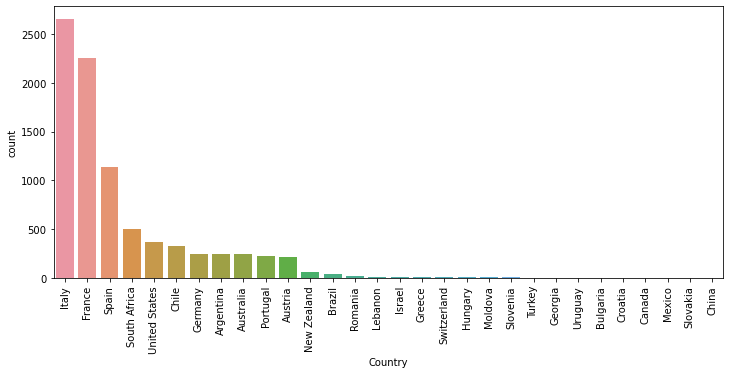

In [15]:
fig, ax = plt.subplots(figsize = [12,5])
plt.xticks(rotation = "vertical")
sns.countplot(wines.Country, order = wines.Country.value_counts().index)

### Region

Al igual que en el caso de names, se tienen muchos nombres de regiones diferentes y su visualización es díficil de representar por medio de una gráfica. En este caso, se graficará las 20 regiones con más número de registros.

In [16]:
len(wines.Region.unique())

624

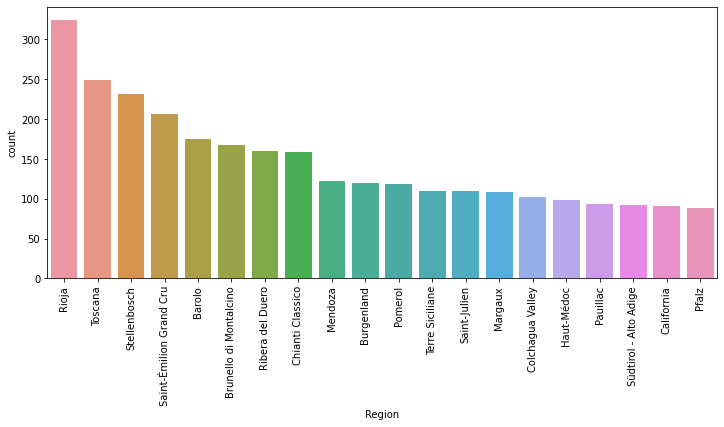

In [17]:
fig, ax = plt.subplots(figsize = [12,5])
plt.xticks(rotation = "vertical")
sns.countplot(wines.Region,order =wines.Region.value_counts().index[:20])

### Winery

El mismo caso que el nombre. Se graficarán solo las primeras 20 vinerías.

In [18]:
len(wines.Winery.unique())

2714

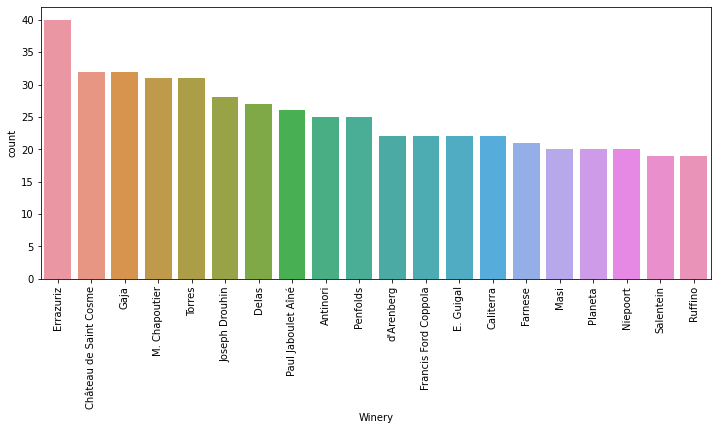

In [19]:
fig, ax = plt.subplots(figsize = [12,5])
plt.xticks(rotation = "vertical")
sns.countplot(wines.Winery,order =wines.Winery.value_counts().index[:20])

### Rating

El kernel de la representación de los datos, si bien no es una campana exacta, podemos inferir que puede tender a tener un comportamiento normal. 

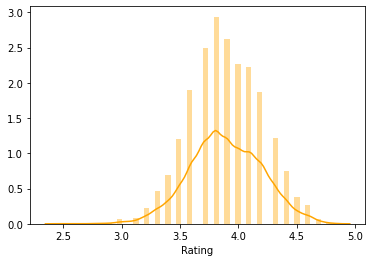

In [20]:
sns.distplot(wines.Rating, color = "orange")

### NumberOfRatings

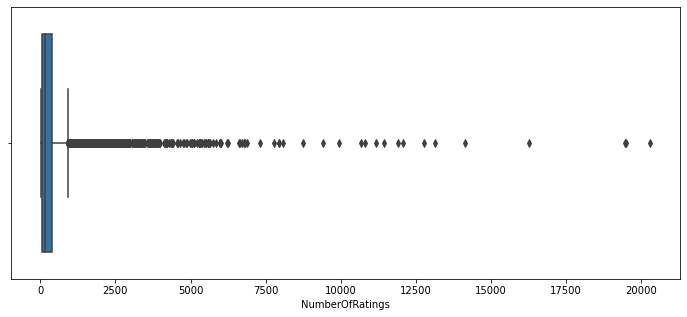

In [21]:
fig, ax = plt.subplots(figsize = [12,5])
sns.boxplot(wines.NumberOfRatings)

### Price

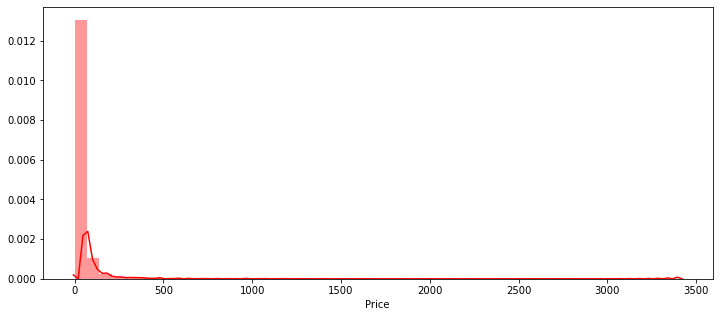

In [22]:
fig, ax = plt.subplots(figsize = [12,5])
sns.distplot(wines.Price, color = "red")

#### Price por país.
Se eliminó el mayor _outlier_ para una mejor representación. Este corresponde al valor 3400 correspondiente a Francia. <br>
Francia tiene los vinos más caros, en contraste con Bulgaria y Canada, entro otros países.

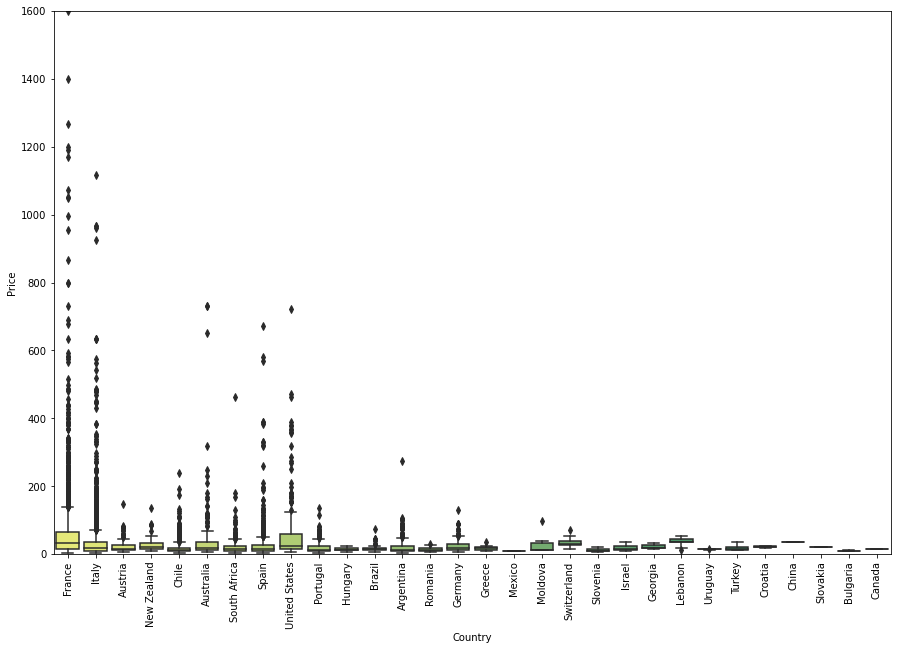

In [23]:
fig, ax = plt.subplots(figsize = [15,10])
plt.xticks(rotation = "vertical")
ax.set(ylim = (0,1601))
sns.boxplot(y = "Price", x = "Country", data = wines, palette = "summer_r" ) 

### Year

Se tienen muy pocos registros de vinos desde 1988 hasta 2004. Por otra parte, vinos del 2015 al 2018 son los que predominan en la lista. Existen valores N.V o No Values que deben ser manipulados de la mejor forma para la modelación.

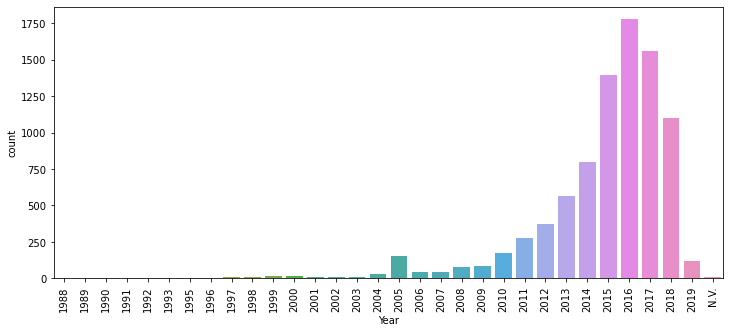

In [24]:
fig, ax = plt.subplots(figsize = [12,5])
plt.xticks(rotation = "vertical")
sns.countplot(wines.Year, order = wines.Year.value_counts().sort_index().index )

Data Wrangling / Feature Engineering
---
[Esta página](https://www.famigliacecchi.it/en/news/which-factors-determine-the-price-of-wine/190) puede resultar bastante útil. A pesar de que me deje guiar más por lo que sé y por lo que he escuchado, tome en cuenta algunos puntos mencinados ahí.

### Name

La variable __Name__ me parece muy poca informativa. Uno no compra un vino (o no tiene valor agregado) gracias a su nombre. Además, un mismo nombre puede pertenecer a varios vinos que ni siquiera son producidos en el mismo país de origen; más aún, ni siquiera sus precios se asemejan. <br>
Tomaré como ejemplo _Cabernet Sauvignon 2017_, el cual es el nombre de varios vinos en la lista. 

In [25]:
muestra1 = wines[wines["Name"] == "Cabernet Sauvignon 2017"].head(); muestra1

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
307,Cabernet Sauvignon 2017,South Africa,Stellenbosch,Stark-Condé,3.8,108,11.99,2017
517,Cabernet Sauvignon 2017,United States,California,Barefoot,3.3,1155,6.00,2017
789,Cabernet Sauvignon 2017,United States,California,Wines from Hahn Estate,3.7,1250,19.20,2017
815,Cabernet Sauvignon 2017,Australia,Riverina,Richland,3.5,126,9.78,2017
959,Cabernet Sauvignon 2017,South Africa,Western Cape,Protea,3.3,132,8.95,2017


Este es producido en 3 países diferentes.

In [26]:
muestra1.Country.unique()

array(['South Africa', 'United States', 'Australia'], dtype=object)

Producido en 4 regiones diferentes, lo cual quiere decir que en un país se produce en dos regiones diferentes.

In [27]:
muestra1.Region.unique()

array(['Stellenbosch', 'California', 'Riverina', 'Western Cape'],
      dtype=object)

Aún más importante, el máximo rating (3.8) y el mímino (3.3) distan por .5 puntos. 

In [28]:
muestra1.Rating.unique()

array([3.8, 3.3, 3.7, 3.5])

La relación con la variable __target__ carece de sentido, pues el máximo precio con el mismo nombre (19.2) y el mínimo (6) tienen una diferencia de 13.2 puntos. 

In [29]:
muestra1.Price.unique()

array([11.99,  6.  , 19.2 ,  9.78,  8.95])

Además, hay que puntualizar que existen 6721 nombres diferentes. En otras palabras, el transformar a variables dummies cada uno de estos registros ¡equivaldría a crear 6720 nuevos _features_!<br>
Con base en lo anterior, he llegado a la conclusión de que la variable _Name_ no debe ser tomada en cuenta para la modelación. 

In [30]:
wines.drop(columns = "Name", inplace = True)

### Country

Existen 30 paises con sus nombres literales. Necesito codificarlos con "ausencias y presencias", es decir, ceros y unos. Para ello, utilizaré _get_dummies_.

In [31]:
du_Country = pd.get_dummies(wines.Country,drop_first = True);du_Country

,Australia,Austria,Brazil,Bulgaria,Canada,Chile,China,Croatia,France,Georgia,Germany,Greece,Hungary,Israel,Italy,Lebanon,Mexico,Moldova,New Zealand,Portugal,Romania,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,United States,Uruguay
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8663,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8664,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Region


Existen 624 regiones. Hasta donde yo sé, en el caso de vinos franceses, la región en donde se produzca el vino SÍ ES RELAVANTE porque su sabor varía de región a región. Aun cuando esto significaría agregar 623 _features_ nuevos, considero que es bueno tomarlas en cuenta.

In [32]:
dum_Region = pd.get_dummies(wines.Region,drop_first = True);dum_Region

,Abruzzo,Aconcagua,Aconcagua Costa,Aconcagua Valley,Adelaide Hills,Agio Oros,Aglianico del Vulture,Agrelo,Ahr,Ahrweiler,Aigle,Alenquer,Alentejano,Alentejo,Alexander Valley,Alghero,Alicante,Almansa,Almeirim,Aloxe-Corton,Alsace,Amarone della Valpolicella,Amarone della Valpolicella Classico,Amarone della Valpolicella Valpantena,Anderson Valley,Aragón,Arbois,Ardèche,Arroyo Seco,Aude,Baden,Bairrada,Bajo Aragón,Bandol,Barbaresco,Barbera d'Alba,Barbera d'Asti,Barbera del Monferrato,Barbera del Monferrato Superiore,Barco Reale di Carmignano,Bardolino,Bardolino Classico,Bardolino Superiore,Barolo,Barossa,...,Venezia Giulia,Ventoux,Verona,Victoria,Vigneti delle Dolomiti,Villány,Vin de France,Vin de Pays,Vino Nobile di Montepulciano,Vino d'Italia,Vino de España,Vins des Allobroges,Vinsobres,Vipava,Vista Flores,Volnay,Volnay 1er Cru 'Carelle sous la Chapelle',Volnay 1er Cru 'Clos de la Barre',Volnay 1er Cru 'Clos des Chênes',Volnay 1er Cru 'Santenots',Volnay Premier Cru,Vosne-Romanée,Vosne-Romanée 1er Cru 'Les Beaux Monts',Vosne-Romanée Premier Cru,Vougeot 1er Cru 'Les Petits Vougeots',Wachau,Wagram,Wahluke Slope,Waipara,Wairarapa,Walker Bay,Walla Walla Valley,Washington,Weinviertel,Wellington,Western Cape,Wien,Willamette Valley,Württemberg,Yamhill-Carlton District,Yecla,Zürich,delle Venezie,Échezeaux Grand Cru,Štajerska
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Winery

Además de la región, uno podría llegar a encontrar en la misma dos vinos con el mismo nombre pero producidos por diferentes vinerias. Esto es, una vinería puede tener diferentes cuidados que pueden incrementar o decrementar el valor del vino. Por lo tanto, también tomaré en cuenta esta variable. 

In [33]:
dum_Winery = pd.get_dummies(wines.Winery,drop_first = True);dum_Winery

,19 Crimes,4 Kilos Vinícola,4G Wine Estate,689 - Six Eight Nine,A Mano,A Portela,A. Christmann,Aaldering,Aalto,Abadal,Abadia Retuerta,Abadia de Acon,Achaval-Ferrer,Acustic Celler,Adams,Agronavarra,Aia Vecchia,Akilia,Alain Chabanon,Alain Jaume,Alain Voge,Alamos,Albert Bichot,Albet i Noya,Albino Armani,Albola,Alceño,Alde Gott,Aldeya,Aldinger,Aldo Conterno,Aldo Rainoldi,Alessandro e Gian Natale Fantino,Algueira,Alira,Alión,Allegranza,Allegrini,Allendorf,Allesverloren,Allée Bleue,Alma de Casa,Almaviva,Alois Lageder,Alpasión,...,Whitehaven,Wieninger,Wild Rock,Wilhelm Walch,Windmeul Kelder Cellar,Wines from Hahn Estate,Winkler-Hermaden,Winzer Krems,Winzergenossenschaft Mayschoss-Altenahr,Winzervereinigung Freyburg-Unstrut,Wirra Wirra,Wittmann,Wolf Blass,Wolfberger,Woodbridge by Robert Mondavi,Woodhaven,Wölffer Estate,Xanadu,Xavier Vignon,Y/M - Yannick Alléno & Michel Chapoutier,Yalumba,Yarden,Yellow Tail,Yllera,Yvon Mau,Z1N,Zabu,Zantho,Zenato,Zeni,Zevenwacht,Ziereisen,Zonin,Zonnebloem,Zýmē,a6mani,d'Arenberg,de Gras,de Ladoucette,di Lenardo,Ànima Negra,Álvaro Palacios,Áster,Ökonomierat Rebholz,Κτημα Τσελεπου (Ktima Tselepos)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### NumberOfRatings

Por la Ley de los grandes números, puedo asegurar que a mayor número de personas que critican al vino, su "rating" será más certero que aquellos que solo tienen 5 o 10 críticas. Sin embargo, ¿este tendría razón para ser considerado en el modelo? Es decir, si compro un vino, ¿me fijo en el número de críticas que tiene? no realmente, quízas en el contenido de la crítica sí, pero no en el número como tal.

El coeficiente de correlación lineal entre __NumberOfRatings__ y __Price__ es del .0064, algo extremadamente cercano al cero. Por lo tanto, he llegado a la conclusión de eliminar esta variable de mi conjunto para modelado.

El coeficiente de correlación lineal entre ambas variables es: 0.0064


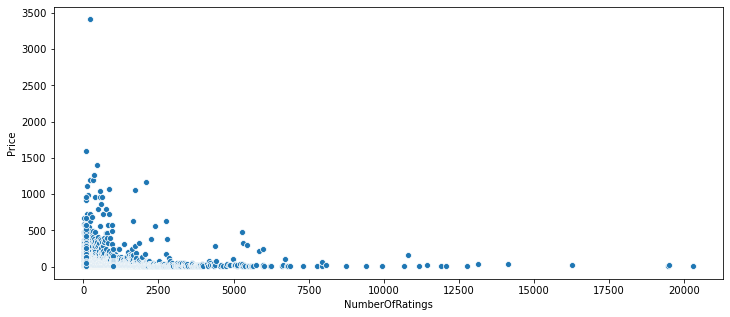

In [34]:
print("El coeficiente de correlación lineal entre ambas variables es:",round(np.corrcoef(wines.NumberOfRatings,wines.Price)[0,1],4))
fig, ax = plt.subplots(figsize = [12,5])
sns.scatterplot(x = "NumberOfRatings", y = "Price", data = wines)

In [35]:
wines.drop(columns = "NumberOfRatings", inplace = True)

### Year

Como ya se había visto en la visualización de los datos, esta columna contiene valores NaN. Dado que son solamente 8 registros y en aras de no inflar la moda de __Year__, he decidido eliminar estos registros.

In [36]:
NV = wines[wines["Year"] == "N.V."];NV

,Country,Region,Winery,Rating,Price,Year
197,South Africa,Stellenbosch,De Toren,4.1,14.38,N.V.
282,United States,Napa Valley,Opus One,4.4,154.99,N.V.
943,Chile,Lontue Valley,Caballo Loco,4.4,34.07,N.V.
2201,Italy,Vino d'Italia,San Marzano,4.3,16.38,N.V.
2404,Italy,Montepulciano d'Abruzzo,Tenuta Ulisse,4.6,30.90,N.V.
4527,Italy,Reggiano,Riunite,3.7,5.89,N.V.
4833,France,Vin de France,Château de Saint Cosme,3.6,7.90,N.V.
5632,Italy,Vino d'Italia,Farnese,3.7,7.75,N.V.


In [37]:
wines.drop(NV.index, inplace = True)

### DataFrame FINAL


__NOTA__: tuve que volver a borrar valores NaN porque al juntas todos los DataFrames volvieron a surgir los NaN dado que solo los borre de un conjunto de datos. Por eso siempre se borrar antes de procesar cada uno de los DataFrames (Antes de Data Wrangling / Feature Engineering).

In [54]:
Final = pd.concat([du_Country,dum_Region,dum_Winery,wines[["Rating","Year","Price"]]], axis = 1)
Final.dropna(inplace = True)
Final.reset_index(inplace=True,drop = True)
Final

,Australia,Austria,Brazil,Bulgaria,Canada,Chile,China,Croatia,France,Georgia,Germany,Greece,Hungary,Israel,Italy,Lebanon,Mexico,Moldova,New Zealand,Portugal,Romania,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,United States,Uruguay,Abruzzo,Aconcagua,Aconcagua Costa,Aconcagua Valley,Adelaide Hills,Agio Oros,Aglianico del Vulture,Agrelo,Ahr,Ahrweiler,Aigle,Alenquer,Alentejano,Alentejo,Alexander Valley,Alghero,...,Wilhelm Walch,Windmeul Kelder Cellar,Wines from Hahn Estate,Winkler-Hermaden,Winzer Krems,Winzergenossenschaft Mayschoss-Altenahr,Winzervereinigung Freyburg-Unstrut,Wirra Wirra,Wittmann,Wolf Blass,Wolfberger,Woodbridge by Robert Mondavi,Woodhaven,Wölffer Estate,Xanadu,Xavier Vignon,Y/M - Yannick Alléno & Michel Chapoutier,Yalumba,Yarden,Yellow Tail,Yllera,Yvon Mau,Z1N,Zabu,Zantho,Zenato,Zeni,Zevenwacht,Ziereisen,Zonin,Zonnebloem,Zýmē,a6mani,d'Arenberg,de Gras,de Ladoucette,di Lenardo,Ànima Negra,Álvaro Palacios,Áster,Ökonomierat Rebholz,Κτημα Τσελεπου (Ktima Tselepos),Rating,Year,Price
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.2,2011,95.00
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.3,2017,15.50
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.9,2015,7.45
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.5,2019,8.72
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.9,2016,29.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.8,2016,16.47
8654,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,2016,20.09
8655,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.7,2010,23.95
8656,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.5,2019,6.21


Separar los datos
---

In [39]:
x_train, x_test, y_train, y_test = train_test_split(Final.drop(columns = "Price"), 
                                                    Final.Price, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

Construir el modelo
---

### ¿Qué lambda es mejor escoger?

In [40]:
ridge = Ridge()
parametros = {"alpha": np.linspace(0,250,20)} # np.linspace(250,-250,20)
ridge_re = GridSearchCV(ridge, parametros, scoring = "neg_mean_squared_error", cv = 5)
ridge_re.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([  0.        ,  13.15789474,  26.31578947,  39.47368421,
        52.63157895,  65.78947368,  78.94736842,  92.10526316,
       105.26315789, 118.42105263, 131.57894737, 144.73684211,
       157.89473684, 171.05263158, 184.21052632, 197.36842105,
       210.52631579, 223.68421053, 236.84210526, 250.        ])},
             scoring='neg_mean_squared_error')

In [41]:
ridge_re.best_params_["alpha"]

13.157894736842104

In [42]:
ridge_re.best_score_

-4669.537391130727

### Modelo con la lambda más adecuada (según los valores probados)

In [43]:
ridge_best = Ridge(alpha = ridge_re.best_params_["alpha"], normalize = True)
ridge_best.fit(x_train,y_train)

Ridge(alpha=13.157894736842104, normalize=True)

### Coeficientes de la regresión

In [44]:
pd.Series(ridge_best.coef_, index = Final.drop(columns = "Price").columns)

Australia                          0.338233
Austria                           -0.978953
Brazil                            -1.144107
Bulgaria                          -1.705277
Canada                            -1.152452
                                     ...   
Áster                             -1.029186
Ökonomierat Rebholz               -1.090995
Κτημα Τσελεπου (Ktima Tselepos)   -1.547196
Rating                             8.047528
Year                              -0.585276
Length: 3367, dtype: float64

Varios de los coeficientes se aproximan mucho a cero y no tienen gran relevancia al modelo. Esto puede explicarse a que muchas (dummies) columnas tienen pocos valores distintos a cero.

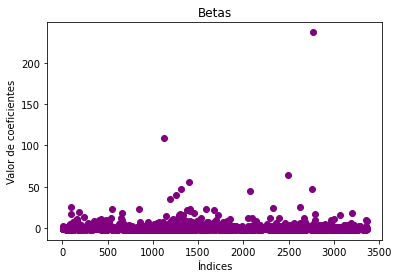

In [45]:
eje_X = range(1,len(ridge_best.coef_)+1,1)
plt.scatter(eje_X, ridge_best.coef_, color = 'purple')
plt.title('Betas')
plt.xlabel('Índices')
plt.ylabel('Valor de coeficientes')
plt.show()

Predicciones
---

In [46]:
y_pred = ridge_best.predict(x_test)

Evaluación del modelo
---

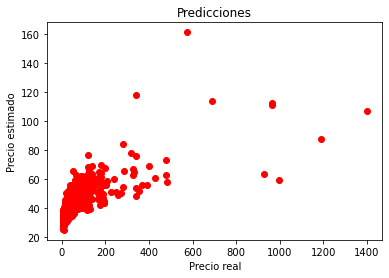

In [47]:
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Predicciones')
plt.xlabel('Precio real')
plt.ylabel('Precio estimado')
plt.show()

### $R^2$

In [48]:
r_cuadrada = r2_score(y_test,y_pred)
round(r_cuadrada,3)

0.148

### $R^2$ adj

R-cuadrado supone que cada variable independiente en el modelo explica la variación en la variable dependiente. Da el porcentaje de variación explicada como si todas las variables independientes en el modelo afectaran a la variable dependiente, mientras que el R-cuadrado ajustado da el porcentaje de variación explicado solo por aquellas variables independientes que en realidad afectan a la variable dependiente.

El R cuadrada el negativo, esto es, el modelo ni siquiera es malo, es más que malo porque no logró encontrar algún tipo de correlación entre los datos. 

In [49]:
n = len(y_train)
p = x_train.shape[1]
r_cuad_aj = 1 - (((1-r_cuadrada)*(n-1))/(n-p-1))

round(r_cuad_aj,3)

-0.659

### Distribución de errores

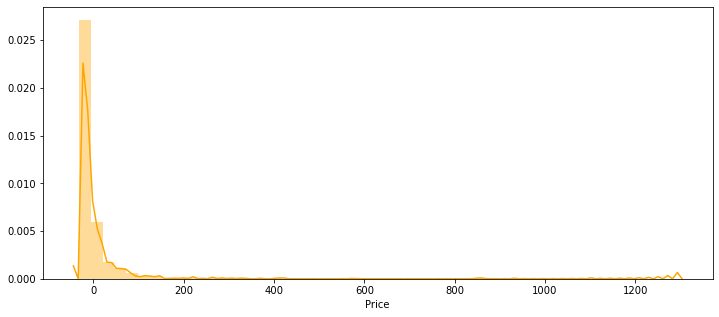

In [57]:
fig, ax = plt.subplots(figsize = [12,5])
sns.distplot((y_test-y_pred),bins=50, color = "Orange")

### Gráfica errores absolutos

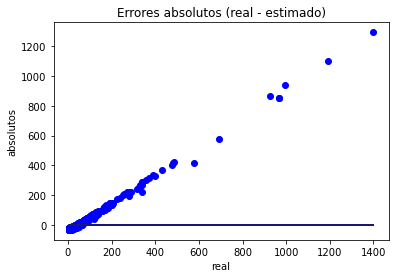

In [51]:
err_abs = y_test-y_pred

plt.scatter(y_test, err_abs, color = 'blue')
plt.plot(y_test, np.zeros(len(err_abs)), color = 'midnightblue')
plt.title('Errores absolutos (real - estimado)')
plt.xlabel('real')
plt.ylabel('absolutos')
plt.show()

### Gráfica errores relativos

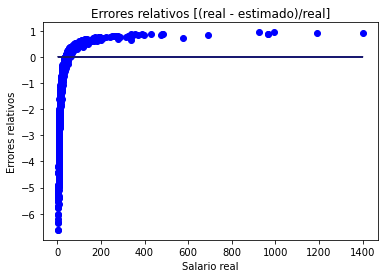

In [52]:
err_rel = err_abs/y_test

plt.scatter(y_test, err_rel, color = 'blue')
plt.plot(y_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores relativos [(real - estimado)/real]')
plt.xlabel('Salario real')
plt.ylabel('Errores relativos')
plt.show()

### Otras métricas

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 30.07932997379501
MSE: 5693.396404491712
RMSE: 75.45459829918725


Conclusión
---

No es nada útil tratar de ajustar una regresión Ridge a los datos. Hay que tratar esta base de datos con otro modelo de regresión. Dado que muchas de las betas tienen un valor muy cercano a cero, podría inferir que un mejor modelo seria la regresión Lasso. 